In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
dataset = pd.read_csv('./data/emails.csv')
features = dataset.columns[80:160]
X = dataset[features].values
y = dataset['Prediction'].values

print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(5172, 80) (5172,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   2   0   0   0   2   2   1   3   0   0   0  15   0   1   0
    0   0   0   0   0   1   0   2   0   2   0   0   0   0   0   0   1   0
    0   2   0   0   0   1   0   0   0   0  19   0   0   1  17   3   0   0
    0   0   0   0   0 131   0  68  13   0   0   5   0   0   1   0   0   0
    2   0   0   0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   1   0   0   0   2   0   0   0
    0   0   0   0   0   5   0   4   0   0   0   0   0   0   0   0   0   0
    2   0   0   0   0  

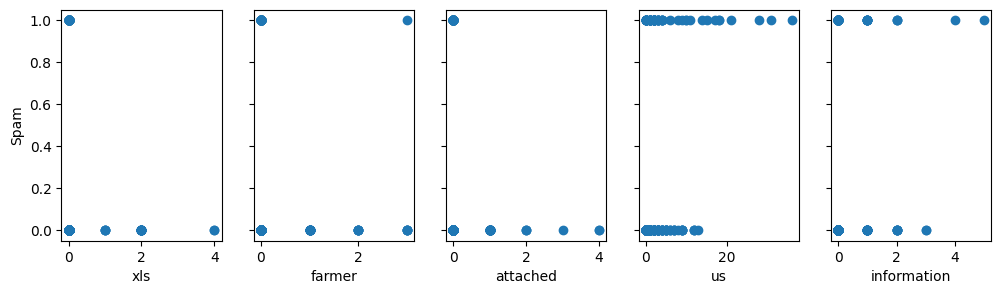

In [106]:
# Plot the features
def plot_features(X, y, features, pred=None):
    fig, ax = plt.subplots(1, len(features[:5]), figsize=(12, 3), sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(X[:,i], y)
        if pred is not None:
            ax[i].scatter(X[:,i], pred, color='orange')
        ax[i].set_xlabel(features[i])
    ax[0].set_ylabel("Spam")
    plt.show()

plot_features(X[:300], y[:300], features[:5])

In [107]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

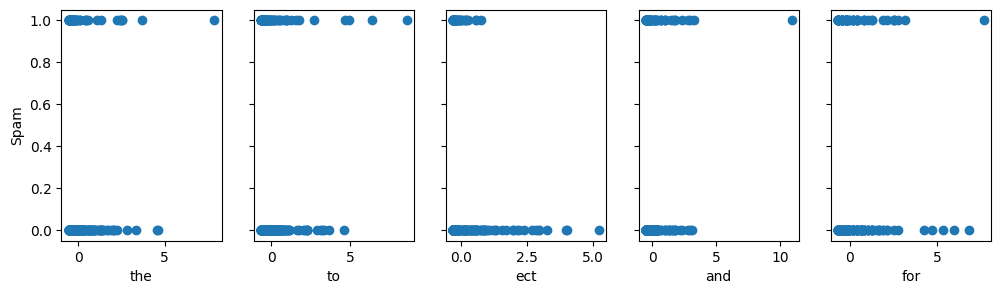

In [56]:
plot_features(X[:300], y[:300], features[:5])

In [108]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3879, 80), (1293, 80), (3879,), (1293,))

In [109]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [110]:
y_pred = model.predict(X)

print(y_pred[:50])
print(y[:50])

[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0]
